<a href="https://colab.research.google.com/github/ufkenedy/3MTT-capstone-projects/blob/main/submission1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First I will import the required libraries and load all 6 datas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:

df_country=pd.read_csv('country_wise_latest.csv')
df_clean=pd.read_csv('covid_19_clean_complete.csv')
df_day=pd.read_csv('day_wise.csv')
df_full=pd.read_csv('full_grouped.csv')
df_world=pd.read_csv('worldometer_data.csv')
df_states=pd.read_csv('usa_country_wise.csv')

In [5]:
# commence data cleanup process
df_country.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [6]:
df_clean.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [7]:
df_clean.tail(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49048,Northwest Territories,Canada,64.825500,-124.845700,2020-07-27,5,0,0,5,Americas
49049,Yukon,Canada,64.282300,-135.000000,2020-07-27,14,0,0,14,Americas
49050,NaN,Kosovo,42.602636,20.902977,2020-07-27,7413,185,4027,3201,Europe
49051,NaN,Burma,21.916200,95.956000,2020-07-27,350,6,292,52,South-East Asia
49052,Anguilla,United Kingdom,18.220600,-63.068600,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.420700,-64.640000,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,2020-07-27,99,2,36,61,Europe
49055,NaN,Botswana,-22.328500,24.684900,2020-07-27,739,2,63,674,Africa
49056,NaN,Burundi,-3.373100,29.918900,2020-07-27,378,1,301,76,Africa
49057,NaN,Sierra Leone,8.460555,-11.779889,2020-07-27,1783,66,1317,400,Africa


In [8]:
# cleaning out NaN
df_clean['Province/State'] = df_clean['Province/State'].fillna('')
df_clean.tail(20)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49048,Northwest Territories,Canada,64.825500,-124.845700,2020-07-27,5,0,0,5,Americas
49049,Yukon,Canada,64.282300,-135.000000,2020-07-27,14,0,0,14,Americas
49050,,Kosovo,42.602636,20.902977,2020-07-27,7413,185,4027,3201,Europe
49051,,Burma,21.916200,95.956000,2020-07-27,350,6,292,52,South-East Asia
49052,Anguilla,United Kingdom,18.220600,-63.068600,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.420700,-64.640000,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,2020-07-27,99,2,36,61,Europe
49055,,Botswana,-22.328500,24.684900,2020-07-27,739,2,63,674,Africa
49056,,Burundi,-3.373100,29.918900,2020-07-27,378,1,301,76,Africa
49057,,Sierra Leone,8.460555,-11.779889,2020-07-27,1783,66,1317,400,Africa


In [88]:
df_day.isnull().sum()

,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [89]:
df_full.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [90]:
df_states.isnull().sum()

,0
UID,0
iso2,0
iso3,0
code3,0
FIPS,1880
Admin2,1128
Province_State,0
Country_Region,0
Lat,0
Long_,0


In [91]:
df_states.tail(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0
627919,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",7/27/20,2375,24


In [92]:

# Use a list of column names instead of a tuple
columns_to_fill = ['Deaths', 'Confirmed', 'Date', 'FIPS','Lat','Long_']
df_states[columns_to_fill] = df_states[columns_to_fill].fillna(0)



In [93]:
df_states.tail(5)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
627915,84070016,US,USA,840,0.0,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,0.0,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,0.0,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,0.0,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0
627919,84070020,US,USA,840,0.0,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",7/27/20,2375,24


In [94]:
columns_to_fill = ['Combined_Key','Country_Region','Province_State','Admin2','Lat','Long_']
df_states[columns_to_fill] = df_states[columns_to_fill].fillna('')

In [95]:
df_states.tail(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
627915,84070016,US,USA,840,0.0,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,0.0,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,0.0,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,0.0,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0
627919,84070020,US,USA,840,0.0,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",7/27/20,2375,24


In [96]:
df_world.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [97]:
df_world.tail(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
208,Western Sahara,Africa,598682.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa


In [98]:
columns_to_fill=['NewCases','TotalDeaths','NewDeaths','NewRecovered','TotalRecovered','ActiveCases',
      'Serious,Critical','Deaths/1M pop','TotalTests','Tests/1M pop','Population','TotalCases','Tot Cases/1M pop']
df_world[columns_to_fill]=df_world[columns_to_fill].fillna(0)


In [99]:
df_world.tail(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
204,Montserrat,North America,4992.0,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe
208,Western Sahara,Africa,598682.0,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,17.0,2.0,0.0,0.0,Africa


In [100]:
columns_to_fill=['WHO Region','Continent']
df_world[columns_to_fill]=df_world[columns_to_fill].fillna('')

In [101]:
df_world.tail(15)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
194,Curaçao,North America,164161.0,31,0.0,1.0,0.0,28.0,0.0,2.0,0.0,189.0,6.0,1080.0,6579.0,
195,Fiji,Australia/Oceania,897095.0,27,0.0,1.0,0.0,18.0,0.0,8.0,0.0,30.0,1.0,6693.0,7461.0,WesternPacific
196,Saint Lucia,North America,183712.0,25,0.0,0.0,0.0,24.0,0.0,1.0,0.0,136.0,0.0,3895.0,21202.0,Americas
197,Timor-Leste,Asia,1320812.0,25,0.0,0.0,0.0,24.0,0.0,1.0,0.0,19.0,0.0,4238.0,3209.0,South-EastAsia
198,Grenada,North America,112576.0,24,0.0,0.0,0.0,23.0,0.0,1.0,0.0,213.0,0.0,6252.0,55536.0,Americas
199,New Caledonia,Australia/Oceania,285769.0,22,0.0,0.0,0.0,22.0,0.0,0.0,0.0,77.0,0.0,11099.0,38839.0,
200,Laos,Asia,7285750.0,20,0.0,0.0,0.0,19.0,0.0,1.0,0.0,3.0,0.0,29374.0,4032.0,WesternPacific
201,Dominica,North America,72004.0,18,0.0,0.0,0.0,18.0,0.0,0.0,0.0,250.0,0.0,1005.0,13958.0,Americas
202,Saint Kitts and Nevis,North America,53237.0,17,0.0,0.0,0.0,16.0,0.0,1.0,0.0,319.0,0.0,1146.0,21526.0,Americas
203,Greenland,North America,56780.0,14,0.0,0.0,0.0,14.0,0.0,0.0,0.0,247.0,0.0,5977.0,105266.0,Europe


In [102]:
# All data cleaned. now check for duplicate
df_world.duplicated().sum()

0

In [103]:
df_states.duplicated().sum()

0

In [104]:
df_full.duplicated().sum()

0

In [105]:
df_clean.duplicated().sum()

0

In [106]:
df_country.duplicated().sum()

0

In [107]:
df_day.duplicated().sum()

0

In [9]:
# now to expand and enrich the dataset and strengthen model insights.
# 'df_states'

# 1. Daily Growth Rates
# Calculate the daily new cases and deaths
df_states['New_Cases'] = df_states.groupby(['Country_Region', 'Province_State'])['Confirmed'].diff().fillna(0)
df_states['New_Deaths'] = df_states.groupby(['Country_Region', 'Province_State'])['Deaths'].diff().fillna(0)

# Calculate daily growth rates for cases and deaths
df_states['Case_Growth_Rate'] = (df_states['New_Cases'] / df_states['Confirmed'].shift(1)).fillna(0)
df_states['Death_Growth_Rate'] = (df_states['New_Deaths'] / df_states['Deaths'].shift(1)).fillna(0)

# Replace infinite values with 0 (to handle division by zero)
df_states.replace([float('inf'), float('-inf')], 0, inplace=True)


# 2. Mortality Ratio
# Calculate the mortality ratio (deaths / confirmed cases)
df_states['Mortality_Ratio'] = (df_states['Deaths'] / df_states['Confirmed']).fillna(0)
df_states.replace([float('inf'), float('-inf')], 0, inplace=True)  # Handle potential division by zero



In [10]:
# 'df_country'



# Calculate daily new cases and deaths
df_country['New_Cases'] = df_country.groupby(['Country/Region'])['Confirmed'].diff().fillna(0)
df_country['New_Deaths'] = df_country.groupby(['Country/Region'])['Deaths'].diff().fillna(0)

# Calculate daily growth rates for cases and deaths
df_country['Case_Growth_Rate'] = (df_country['New_Cases'] / df_country['Confirmed'].shift(1)).fillna(0)
df_country['Death_Growth_Rate'] = (df_country['New_Deaths'] / df_country['Deaths'].shift(1)).fillna(0)

# Replace infinite values with 0 (to handle division by zero)
df_country.replace([float('inf'), float('-inf')], 0, inplace=True)


# 2. Mortality Ratio
# Calculate the mortality ratio (deaths / confirmed cases)
df_country['Mortality_Ratio'] = (df_country['Deaths'] / df_country['Confirmed']).fillna(0)
df_country.replace([float('inf'), float('-inf')], 0, inplace=True)  # Handle potential division by zero


In [11]:
# 'df_full'

# 1. Daily Growth Rates
# We need to sort by date first
df_full.sort_values(by=['Date'], inplace=True)

# Calculate daily new cases and deaths
df_full['New_Cases'] = df_full.groupby(['Country/Region'])['Confirmed'].diff().fillna(0)
df_full['New_Deaths'] = df_full.groupby(['Country/Region'])['Deaths'].diff().fillna(0)

# Calculate daily growth rates for cases and deaths
df_full['Case_Growth_Rate'] = (df_full['New_Cases'] / df_full['Confirmed'].shift(1)).fillna(0)
df_full['Death_Growth_Rate'] = (df_full['New_Deaths'] / df_full['Deaths'].shift(1)).fillna(0)

# Replace infinite values with 0 (to handle division by zero)
df_full.replace([float('inf'), float('-inf')], 0, inplace=True)


# 2. Mortality Ratio
# Calculate the mortality ratio (deaths / confirmed cases)
df_full['Mortality_Ratio'] = (df_full['Deaths'] / df_full['Confirmed']).fillna(0)
df_full.replace([float('inf'), float('-inf')], 0, inplace=True)  # Handle potential division by zero



In [12]:
# df_clean'

# 1. Daily Growth Rates
# sort by date first
df_clean.sort_values(by=['Date'], inplace=True)

# Calculate daily new cases and deaths
df_clean['New_Cases'] = df_clean.groupby(['Country/Region'])['Confirmed'].diff().fillna(0)
df_clean['New_Deaths'] = df_clean.groupby(['Country/Region'])['Deaths'].diff().fillna(0)

# Calculate daily growth rates for cases and deaths
df_clean['Case_Growth_Rate'] = (df_clean['New_Cases'] / df_clean['Confirmed'].shift(1)).fillna(0)
df_clean['Death_Growth_Rate'] = (df_clean['New_Deaths'] / df_clean['Deaths'].shift(1)).fillna(0)

# Replace infinite values with 0 (to handle division by zero)
df_clean.replace([float('inf'), float('-inf')], 0, inplace=True)


# 2. Mortality Ratio
# Calculate the mortality ratio (deaths / confirmed cases)
df_clean['Mortality_Ratio'] = (df_clean['Deaths'] / df_clean['Confirmed']).fillna(0)
df_clean.replace([float('inf'), float('-inf')], 0, inplace=True)  # Handle potential division by zero



In [13]:
# df_day'

# 1. Daily Growth Rates
# sort by date
df_day.sort_values(by=['Date'], inplace=True)

# Calculate daily new cases and deaths
df_day['New_Cases'] = df_day['Confirmed'].diff().fillna(0)
df_day['New_Deaths'] = df_day['Deaths'].diff().fillna(0)

# Calculate daily growth rates for cases and deaths
df_day['Case_Growth_Rate'] = (df_day['New_Cases'] / df_day['Confirmed'].shift(1)).fillna(0)
df_day['Death_Growth_Rate'] = (df_day['New_Deaths'] / df_day['Deaths'].shift(1)).fillna(0)

# Replace infinite values with 0 (to handle division by zero)
df_day.replace([float('inf'), float('-inf')], 0, inplace=True)


# 2. Mortality Ratio
# Calculate the mortality ratio (deaths / confirmed cases)
df_day['Mortality_Ratio'] = (df_day['Deaths'] / df_day['Confirmed']).fillna(0)
df_day.replace([float('inf'), float('-inf')], 0, inplace=True)  # Handle potential division by zero



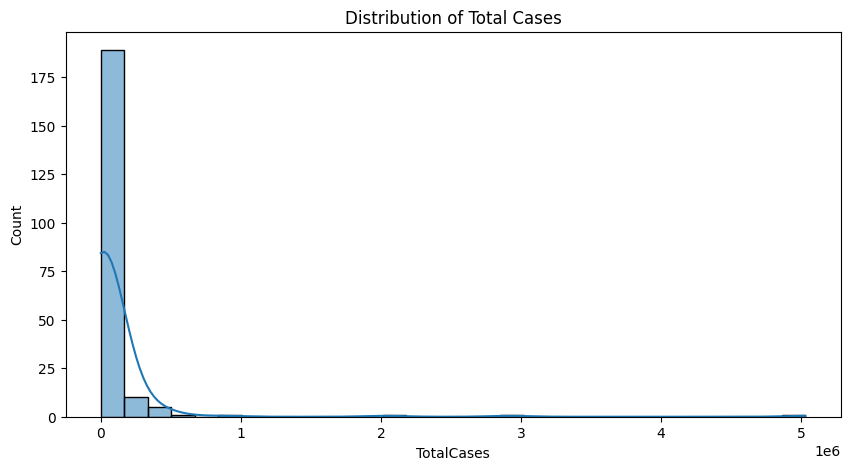

In [14]:
# df_world univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(df_world['TotalCases'], bins=30, kde=True)
plt.title('Distribution of Total Cases')
plt.show()

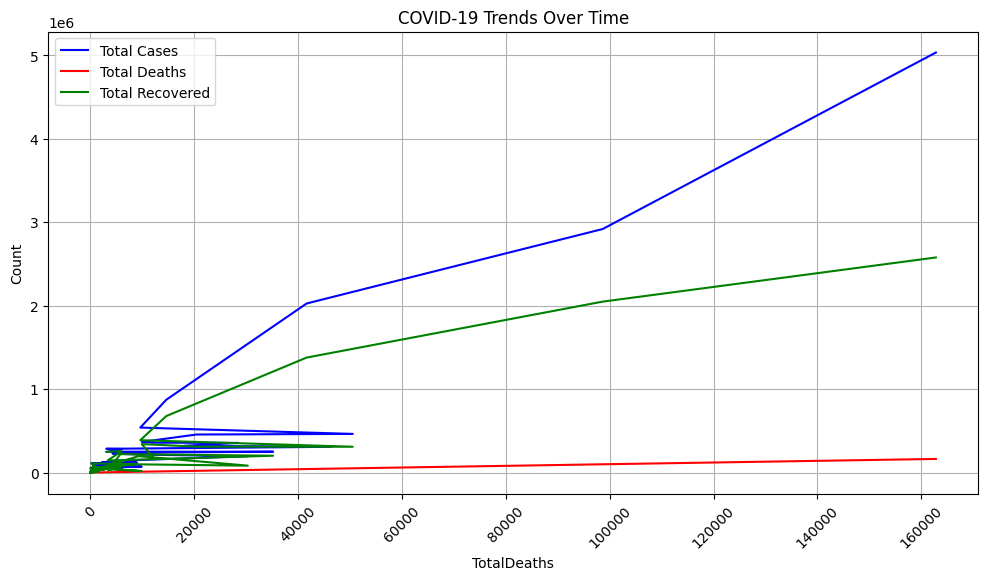

In [15]:
#world bivariate anaysis

plt.figure(figsize=(12, 6))
plt.plot(df_world['TotalDeaths'], df_world['TotalCases'], label='Total Cases', color='blue')
plt.plot(df_world['TotalDeaths'], df_world['TotalDeaths'], label='Total Deaths', color='red')
plt.plot(df_world['TotalDeaths'], df_world['TotalRecovered'], label='Total Recovered', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('TotalDeaths')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

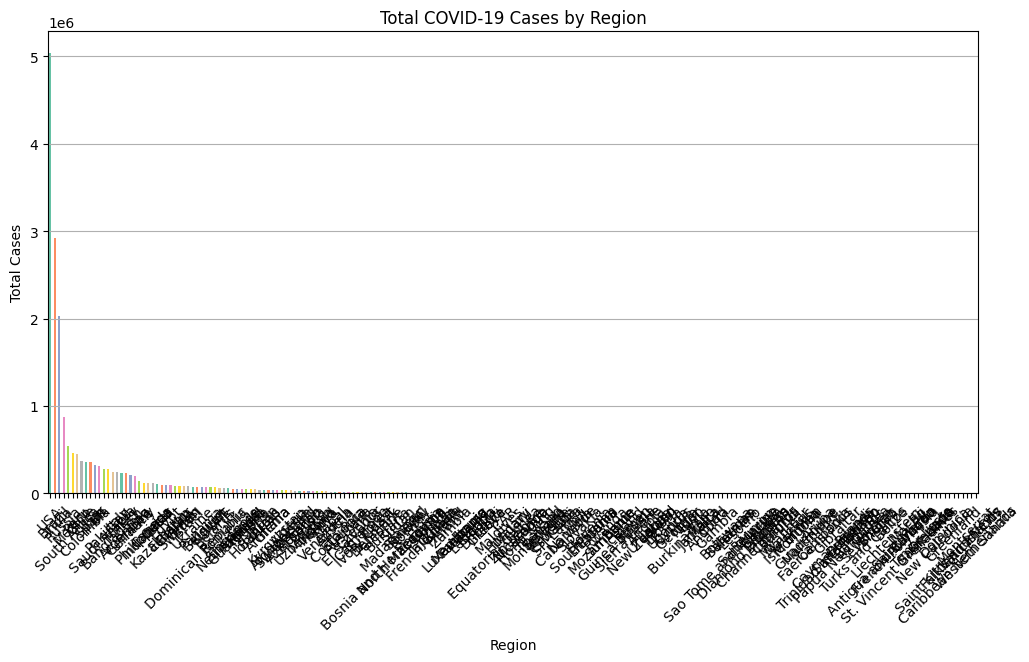

In [16]:
# region compare analysis world

region_data = df_world.groupby('Country/Region')['TotalCases'].sum().sort_values(ascending=False)
region_data.plot(kind='bar', figsize=(12, 6), color=sns.color_palette('Set2'))
plt.title('Total COVID-19 Cases by Region')
plt.ylabel('Total Cases')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

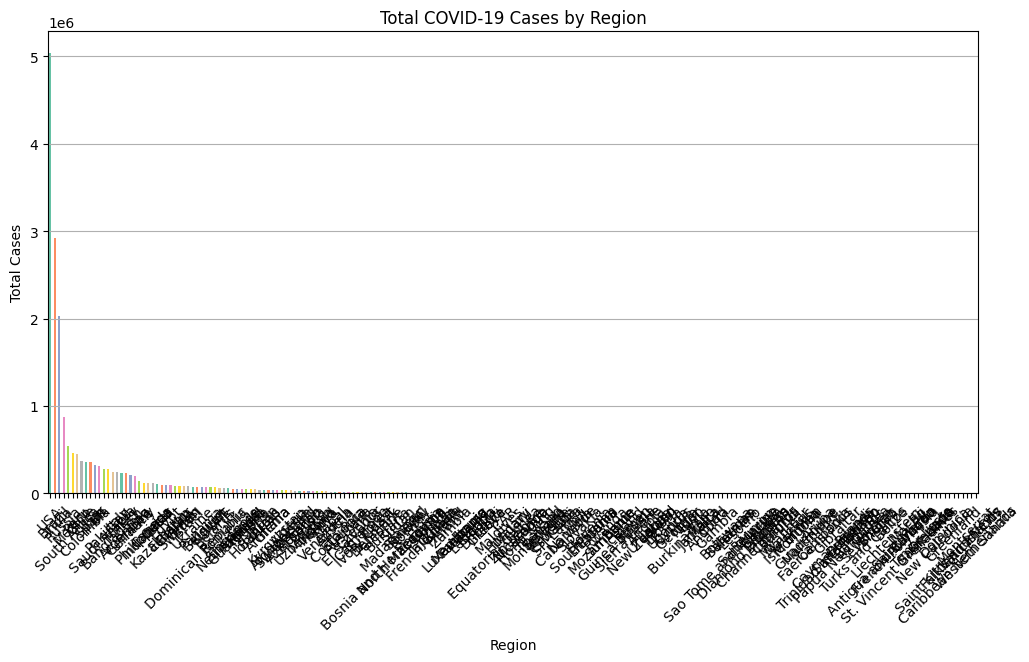

In [17]:
# region compare analysis

region_data = df_world.groupby('Country/Region')['TotalCases'].sum().sort_values(ascending=False)
region_data.plot(kind='bar', figsize=(12, 6), color=sns.color_palette('Set2'))
plt.title('Total COVID-19 Cases by Region')
plt.ylabel('Total Cases')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [18]:
Region = df_world.groupby(by='WHO Region').sum()
Region

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
WHO Region,,,,,,,,,,,,,,,
Africa,South AfricaNigeriaGhanaAlgeriaKenyaEthiopiaCa...,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,1.118461e+09,852026,0.0,15538.0,0.0,604326.0,0.0,232162.0,1097.0,43191.0,679.28,6856722.0,596367.0
Americas,USABrazilMexicoPeruChileColombiaArgentinaCanad...,North AmericaSouth AmericaNorth AmericaSouth A...,1.018880e+09,10452852,7902.0,384637.0,899.0,6259733.0,5076.0,3808482.0,39973.0,146673.0,4932.00,92420577.0,1570567.0
EasternMediterranean,IranSaudi ArabiaPakistanIraqQatarEgyptOmanKuwa...,AsiaAsiaAsiaAsiaAsiaAfricaAsiaAsiaAsiaAsiaAsia...,7.320077e+08,1605866,0.0,42376.0,0.0,1340094.0,0.0,223396.0,7982.0,133235.0,1098.00,19885783.0,1851579.0
Europe,RussiaSpainUKItalyTurkeyGermanyFranceKazakhsta...,EuropeEuropeEuropeEuropeAsiaEuropeEuropeAsiaEu...,9.277339e+08,3544086,0.0,215564.0,0.0,2047446.0,0.0,566295.0,6676.0,233379.0,9868.00,108184582.0,7382226.0
South-EastAsia,IndiaBangladeshIndonesiaNepalMaldivesThailandS...,AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsia,1.997513e+09,2426899,0.0,50624.0,0.0,1621081.0,0.0,755194.0,8958.0,13145.0,108.40,26922262.0,307222.0
WesternPacific,PhilippinesSingaporeJapanAustraliaS. KoreaMala...,AsiaAsiaAsiaAustralia/OceaniaAsiaAsiaAsiaAustr...,5.221449e+08,267114,20.0,3975.0,1.0,182319.0,42.0,80820.0,467.0,13092.0,64.70,13217093.0,744427.0


Text(0.5, 1.0, 'TotalCases')

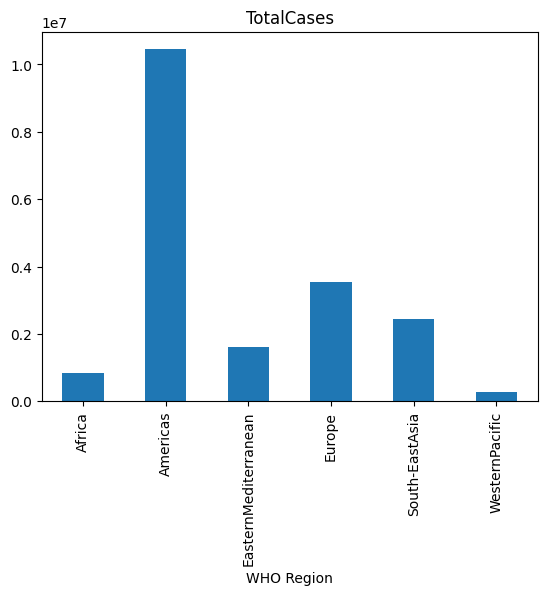

In [19]:
Region['TotalCases'].plot(kind='bar', )
plt.title('TotalCases')

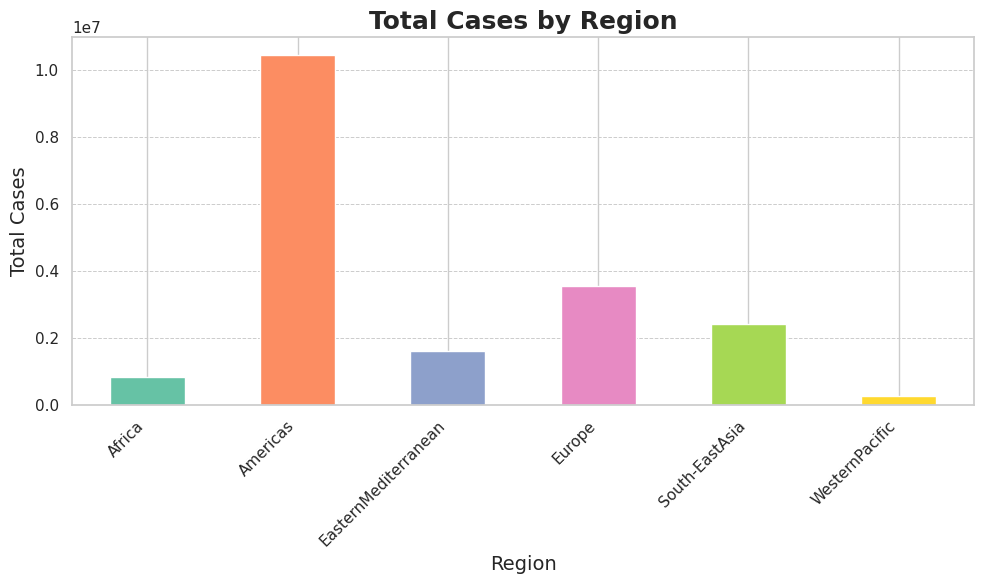

In [20]:
sns.set(style="whitegrid")

# Define figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar plot with a vibrant color palette
ax = Region['TotalCases'].plot(kind='bar', color=sns.color_palette('Set2'))

# Add a title with a larger font size and custom styling
plt.title('Total Cases by Region', fontsize=18, fontweight='bold')

# Label the x-axis and y-axis with custom fonts
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)

# Add gridlines for better data interpretation
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

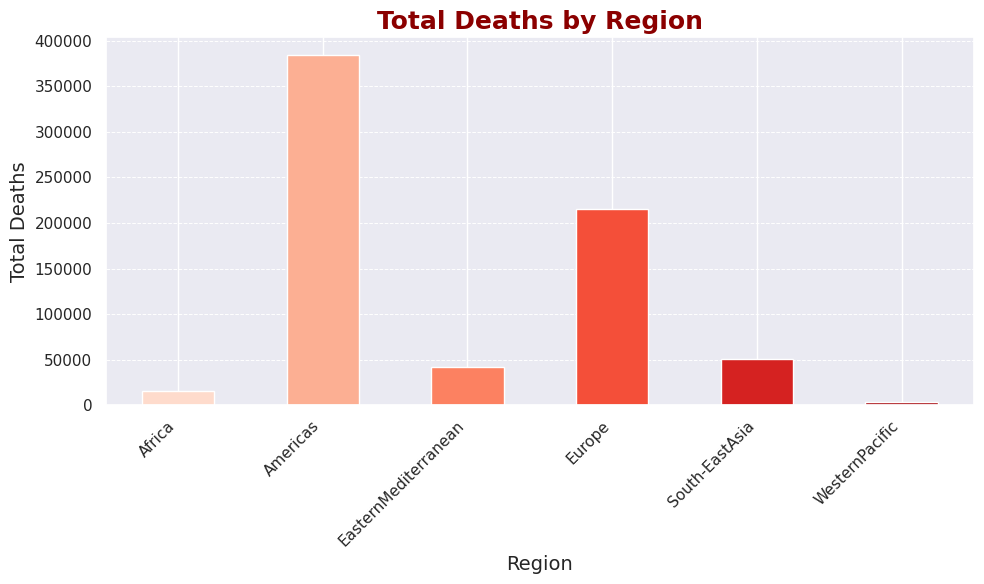

In [21]:
# Set a modern theme
sns.set(style="darkgrid")

# Define figure size for clarity and impact
plt.figure(figsize=(10, 6))

# Create a bar plot with a bold color palette
ax = Region['TotalDeaths'].plot(kind='bar', color=sns.color_palette('Reds', n_colors=len(Region)))

# Add a title with custom styling and larger font size
plt.title('Total Deaths by Region', fontsize=18, fontweight='bold', color='darkred')

# Label the x-axis and y-axis with clear, professional fonts
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)

# Add gridlines to enhance readability, focusing on the y-axis
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

# Rotate the x-axis labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'TotalRecovered')

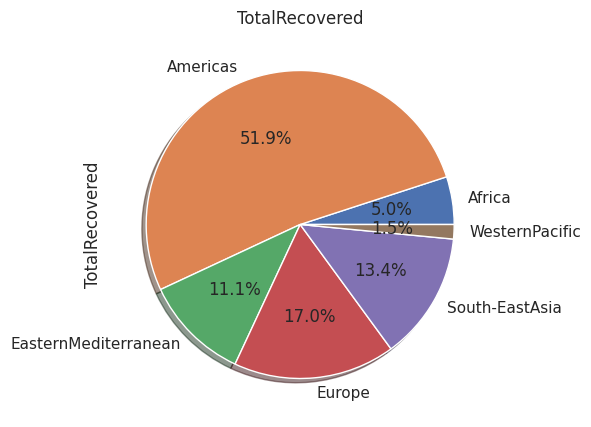

In [22]:
Region['TotalRecovered'].plot(kind='pie',  figsize=(10,5), shadow=True, autopct='%1.1f%%')
plt.title('TotalRecovered')

Text(0.5, 1.0, 'ActiveCases')

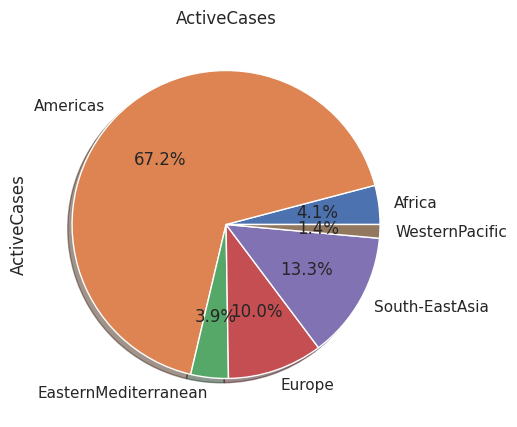

In [23]:


Region['ActiveCases'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%1.1f%%') # autopct create % )
plt.title('ActiveCases')



In [24]:
print(df_world['Country/Region'].unique())

['USA' 'Brazil' 'India' 'Russia' 'South Africa' 'Mexico' 'Peru' 'Chile'
 'Colombia' 'Spain' 'Iran' 'UK' 'Saudi Arabia' 'Pakistan' 'Bangladesh'
 'Italy' 'Turkey' 'Argentina' 'Germany' 'France' 'Iraq' 'Philippines'
 'Indonesia' 'Canada' 'Qatar' 'Kazakhstan' 'Egypt' 'Ecuador' 'Bolivia'
 'Sweden' 'Oman' 'Israel' 'Ukraine' 'Dominican Republic' 'Panama'
 'Belgium' 'Kuwait' 'Belarus' 'UAE' 'Romania' 'Netherlands' 'Singapore'
 'Guatemala' 'Portugal' 'Poland' 'Nigeria' 'Honduras' 'Bahrain' 'Japan'
 'Armenia' 'Ghana' 'Kyrgyzstan' 'Afghanistan' 'Switzerland' 'Algeria'
 'Azerbaijan' 'Morocco' 'Uzbekistan' 'Serbia' 'Moldova' 'Ireland' 'Kenya'
 'Venezuela' 'Nepal' 'Austria' 'Costa Rica' 'Ethiopia' 'Australia'
 'El Salvador' 'Czechia' 'Cameroon' 'Ivory Coast' 'S. Korea' 'Denmark'
 'Palestine' 'Bosnia and Herzegovina' 'Bulgaria' 'Madagascar' 'Sudan'
 'North Macedonia' 'Senegal' 'Norway' 'DRC' 'Malaysia' 'French Guiana'
 'Gabon' 'Tajikistan' 'Guinea' 'Haiti' 'Finland' 'Zambia' 'Luxembourg'
 'Mauritania

<Axes: xlabel='Province_State'>

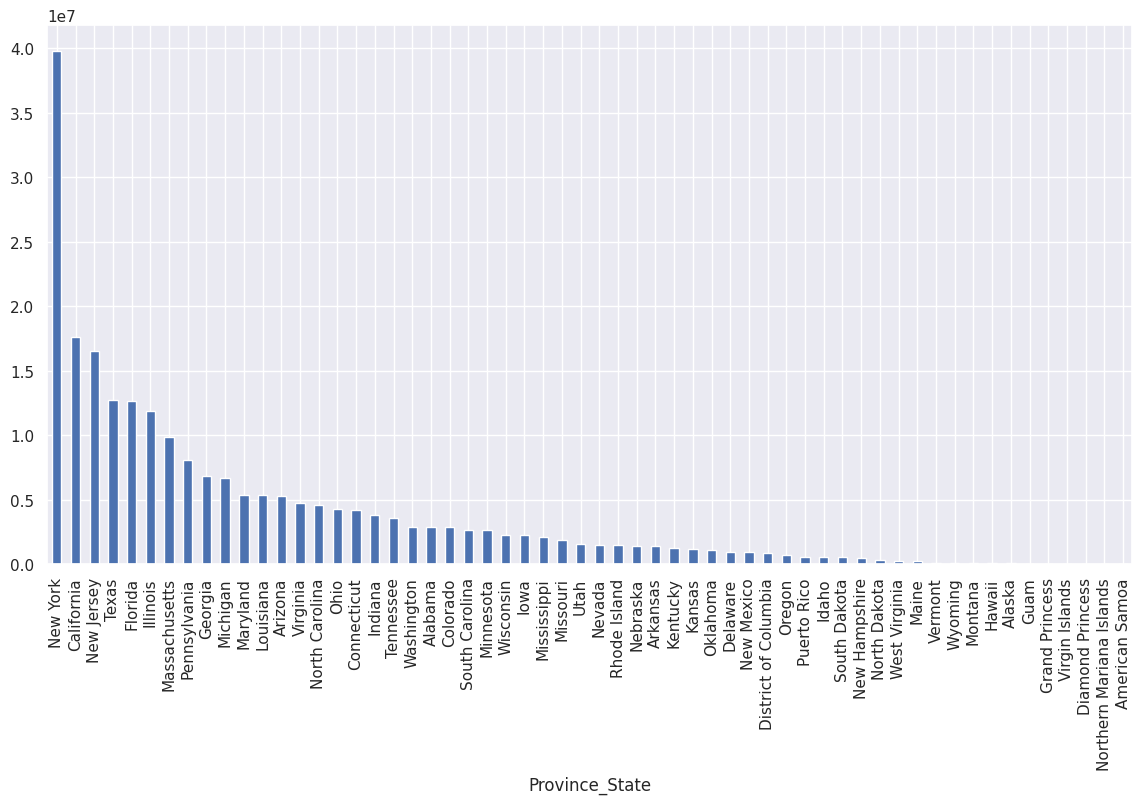

In [25]:
# EDA time series for states
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
df_states.groupby("Province_State")["Confirmed"].sum().sort_values(ascending=False).plot.bar()

<Axes: xlabel='Province_State'>

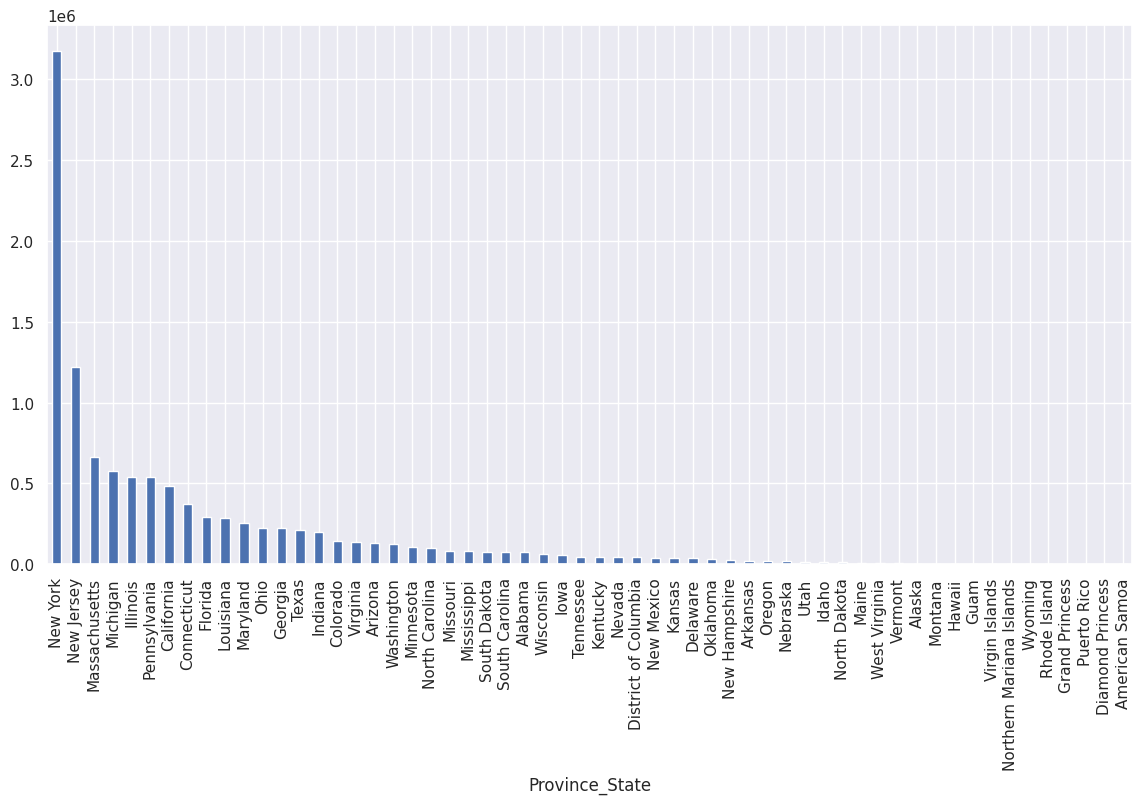

In [26]:
plt.figure(figsize=(14, 7))
df_states.groupby("Province_State")["Deaths"].sum().sort_values(ascending=False).plot.bar()

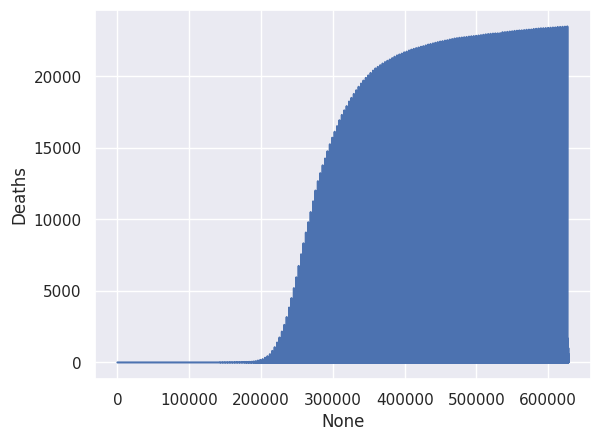

In [27]:
sns.lineplot(df_states, x=df_states["Date"].index, y="Deaths")  # Assuming "Date" is a column in df_states
plt.grid(True)

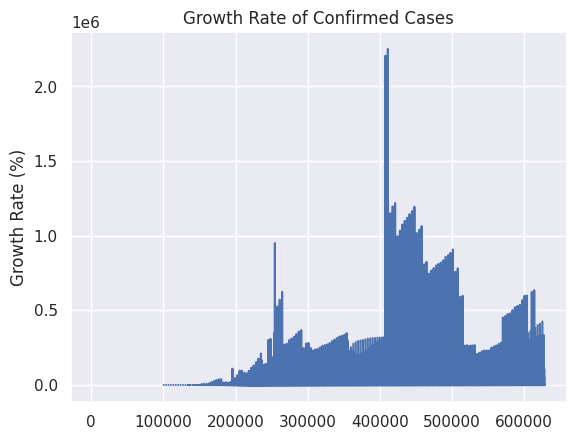

In [28]:
# confirmed cases growth rate
# still on df_states

df_states['Growth Rate'] = (df_states["Confirmed"] - df_states["Confirmed"].shift(1)) / df_states["Confirmed"].shift(1) * 100
plt.plot(df_states.index, df_states['Growth Rate'], linestyle='-', color='b')
plt.xlabel(None)
plt.ylabel('Growth Rate (%)')
plt.title("Growth Rate of Confirmed Cases")
plt.grid(True)


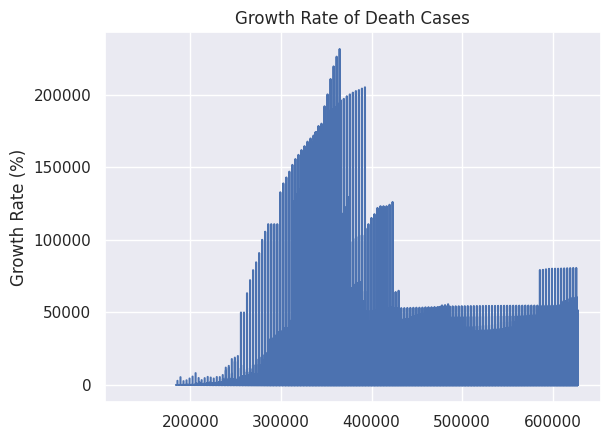

In [29]:
# deaths
df_states['Growth Rate'] = (df_states["Deaths"] - df_states["Deaths"].shift(1)) / df_states["Deaths"].shift(1) * 100
plt.plot(df_states.index, df_states['Growth Rate'], linestyle='-', color='b')
plt.xlabel(None)
plt.ylabel('Growth Rate (%)')
plt.title("Growth Rate of Death Cases")
plt.grid(True)

In [30]:
#Building Time Series Model¶
# Fetching for ARIMA order

!pip install statsmodels

In [31]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.5 MB/s eta 0:00:00


In [ ]:


stepwise_fit_confrimed = auto_arima(df_states["Confirmed"],trace=True,suppress_warnings=True)

stepwise_fit_confrimed.summary()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12007332.283, Time=444.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12363339.530, Time=13.87 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12227958.951, Time=16.75 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12013192.965, Time=285.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12363337.530, Time=10.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12005304.635, Time=544.33 sec


In [32]:
!pip install statsmodels
!pip install pmdarima
from pmdarima.arima import auto_arima





In [ ]:
stepwise_fit_Deaths = auto_arima(df_states["Deaths"],trace=True,suppress_warnings=True)

stepwise_fit_Deaths.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=681.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9318430.142, Time=13.93 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9170647.007, Time=16.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8946560.665, Time=294.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9318428.142, Time=6.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=360.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=271.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=362.35 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8946559.767, Time=65.53 sec


In [33]:
#split data
train= df_states.iloc[:-30]
test= df_states.iloc[-30:]

In [35]:
# ARIMA
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA
model_confirmed = ARIMA(train["Confirmed"],order=(3,2,4))
model_confirmed = model_confirmed.fit()
model_confirmed.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:               627890
Model:                 ARIMA(3, 2, 4)   Log Likelihood            -6015570.639
Date:                Fri, 29 Nov 2024   AIC                       12031157.278
Time:                        11:13:36   BIC                       12031248.079
Sample:                             0   HQIC                      12031182.743
                             - 627890                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6995      0.000  -5229.161      0.000      -1.700      -1.699
ar.L2         -0.7767      0.001  -1409.364      0.000      -0.778      -0.776
ar.L3          0.1216      0.000    417.422      0.000       0.121       0.122
ma.L1         -0.1677      0.000  -1059.053      0.000      -0.168      -0.167
ma.L2         -1.6373      0.000  -8628.023      0.000      -1.638      -1.637
ma.L3         -0.1850      0.000  -1110.691      0.000      -0.185      -0.185
ma.L4          0.9901      0.000   5769.367      0.000       0.990       0.990
sigma2      1.591e+07   4.28e-11   3.72e+17      0.000    1.59e+07    1.59e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):      100678494170.33
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):            8890.13   Skew:                            37.98
Prob(H) (two-sided):                  0.00   Kurtosis:                      1963.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.57e+30. Standard errors may be unstable.
"""

In [8]:
model_deaths = ARIMA(train["Deaths"],order=(4,2,2))
model_deaths = model_deaths.fit()
model_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Deaths   No. Observations:               627890
Model:                 ARIMA(4, 2, 2)   Log Likelihood            -4532692.553
Date:                Fri, 29 Nov 2024   AIC                        9065399.105
Time:                        03:44:33   BIC                        9065478.556
Sample:                             0   HQIC                       9065421.387
                             - 627890                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6812      0.001  -1560.012      0.000      -1.683      -1.679
ar.L2         -1.1465      0.001  -1470.640      0.000      -1.148      -1.145
ar.L3         -0.7008      0.001  -1183.803      0.000      -0.702      -0.700
ar.L4         -0.2356      0.000   -599.796      0.000      -0.236      -0.235
ma.L1         -0.0003      0.001     -0.234      0.815      -0.003       0.002
ma.L2         -0.9997      0.001  -1012.888      0.000      -1.002      -0.998
sigma2      1.091e+05   3.17e-09   3.44e+13      0.000    1.09e+05    1.09e+05
===================================================================================
Ljung-Box (L1) (Q):                1471.39   Jarque-Bera (JB):      213472847197.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):           81430.90   Skew:                            39.84
Prob(H) (two-sided):                  0.00   Kurtosis:                      2858.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.85e+26. Standard errors may be unstable.
"""

In [36]:


start = len(train)
end = len(df_states)-1
pred = model_confirmed.predict(start=start,end=end,typ="levels")
print(pred)



627890    527.389706
627891    104.503777
627892    533.093614
627893    194.289750
627894    382.810744
627895    374.682345
627896    197.904895
627897    524.580966
627898    102.728483
627899    541.461315
627900    160.215924
627901    413.113057
627902    329.775188
627903    225.655677
627904    495.090591
627905    104.943519
627906    543.084348
627907    131.261584
627908    440.438415
627909    285.131185
627910    255.893722
627911    460.806881
627912    113.404916
627913    538.117067
627914    108.073227
627915    463.842501
627916    241.871831
627917    287.525099
627918    422.603114
627919    127.614523
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

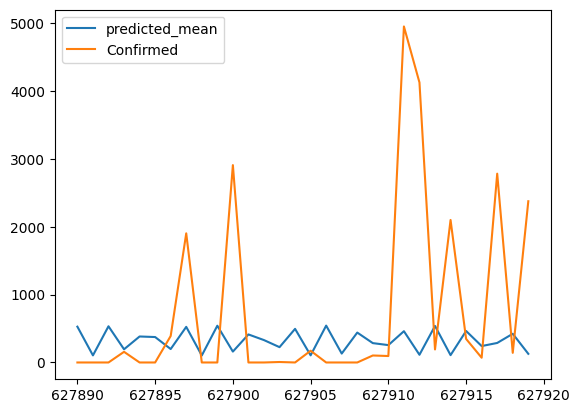

In [11]:
pred.plot(legend=True)
test["Confirmed"].plot(legend=True)

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt  # Import the sqrt function
sqrt(mean_squared_error(pred,test["Confirmed"]))



1454.7499475748964

In [14]:
start = len(train)
end = len(df_states)-1
pred = model_deaths.predict(start=start,end=end,typ="levels")
print(pred)

627890    1.257756
627891   -0.856770
627892    1.256122
627893   -0.753098
627894    1.387810
627895   -0.890379
627896    1.395365
627897   -0.862384
627898    1.404821
627899   -0.883330
627900    1.407800
627901   -0.877540
627902    1.407106
627903   -0.880161
627904    1.407552
627905   -0.878780
627906    1.406723
627907   -0.878661
627908    1.406405
627909   -0.878002
627910    1.405778
627911   -0.877505
627912    1.405278
627913   -0.876947
627914    1.404716
627915   -0.876404
627916    1.404179
627917   -0.875857
627918    1.403631
627919   -0.875311
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

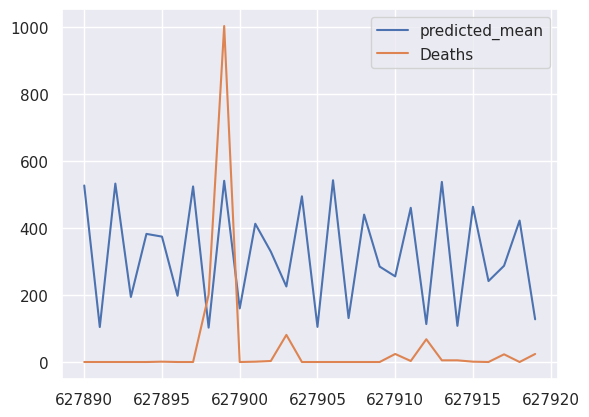

In [38]:
pred.plot(legend=True)
test["Deaths"].plot(legend=True)

In [39]:


sqrt(mean_squared_error(pred,test["Deaths"]))



NameError: name 'sqrt' is not defined

In [ ]:
# LSTM  confirmed

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_states['Confirmed'] = scaler.fit_transform(df_states[['Confirmed']])

In [45]:
# attempt data split
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [46]:


split_idx = int(len(df_states) * 0.8)
train_df_states = df_states.iloc[:split_idx]
test_df_states = df_states.iloc[split_idx:]

trainX, trainY = create_dataset(train_df_states['Confirmed'].values, 30)
testX, testY = create_dataset(test_df_states['Confirmed'].values, 30)



In [47]:
# Reshape still for LSTM


trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))



In [41]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=150, input_shape=(30, 1)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(trainX, trainY, epochs=50, batch_size=32)

Epoch 1/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 736s 47ms/step - loss: 1.3153e-04
Epoch 2/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 727s 46ms/step - loss: 1.3137e-04
Epoch 3/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 723s 46ms/step - loss: 1.1233e-04
Epoch 4/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 744s 46ms/step - loss: 1.2428e-04
Epoch 5/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 742s 46ms/step - loss: 1.3823e-04
Epoch 6/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 739s 46ms/step - loss: 1.3061e-04
Epoch 7/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 737s 46ms/step - loss: 1.3453e-04
Epoch 8/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 722s 46ms/step - loss: 1.1920e-04
Epoch 9/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 741s 46ms/step - loss: 1.1999e-04
Epoch 10/50
15698/15698 ━━━━━━━━━━━━━━━━━━━━ 726s 46ms/step - loss: 1.2261e-04
Epoch 11/50
 8986/15698 ━━━━━━━━━━━━━━━━━━━━ 5:09 46ms/step - loss: 1.2043e-04

In [48]:
# attempting to predict

testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1, 1))



3924/3924 ━━━━━━━━━━━━━━━━━━━━ 77s 20ms/step


In [50]:
from sklearn.metrics import mean_squared_error  #  mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, testPredict))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 5754.383648963747


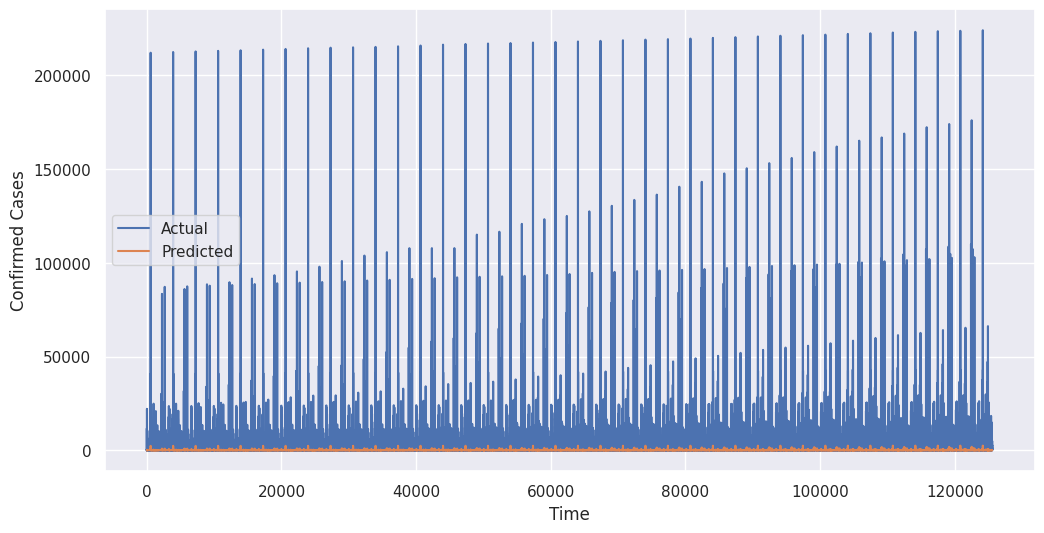

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(testY, label='Actual')
plt.plot(testPredict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()